## Importing Necessary Libraries

In [352]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("C:/Users/Asus/Downloads/ineu/Customer.csv",encoding='latin1')
df = pd.DataFrame(df)
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


## Data Preprocessing

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Need to convert InvoiceDate from object to Datetime

In [354]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='mixed')

In [355]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


Since there are null values , lets drop them 

In [356]:
df=df.dropna()

In [357]:
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [358]:
df.shape

(406829, 8)

In [359]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


observed that quantity has negative values and min value of unitprice is 0 which is free

In [360]:
df.query('Quantity<0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


Negative Quantities are cancelled purchases.there are 8905 cancelled purchases. C is appended at beginning of all invoice of cancelled purchases

In [361]:
print('Length',df.query('UnitPrice<=0').value_counts().sum())
df.query('UnitPrice<=0')

Length 40


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom


40 items are free 

In [362]:
df['InvoiceNo']=df['InvoiceNo'].astype('str')
df=df[~df['InvoiceNo'].str.contains('C')]

In [363]:
df=df[df['UnitPrice']>0]
df.query('UnitPrice<0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [364]:
df['year']=df['InvoiceDate'].apply(lambda x:x.year)
df['month_no']=df['InvoiceDate'].apply(lambda x:x.month)
df['day_no']=df['InvoiceDate'].apply(lambda x:x.day)
df['hour']=df['InvoiceDate'].apply(lambda x:x.hour)
df['minute']=df['InvoiceDate'].apply(lambda x:x.minute)

In [365]:
df['Month']=df['InvoiceDate'].dt.month_name()
df['Day']=df['InvoiceDate'].dt.day_name()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_no,day_no,hour,minute,Month,Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,12,50,December,Friday
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,12,50,December,Friday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12,50,December,Friday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12,50,December,Friday


In [366]:
df['Total_amount']=df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_no,day_no,hour,minute,Month,Day,Total_amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,12,50,December,Friday,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,12,50,December,Friday,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12,50,December,Friday,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12,50,December,Friday,16.60


In [367]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_no', 'day_no',
       'hour', 'minute', 'Month', 'Day', 'Total_amount'],
      dtype='object')

In [368]:
top_10_prod=df['Description'].value_counts().reset_index().rename(columns={'Description':'Product'}).head(10)
top_10_prod

,Product,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


Text(0.5, 1.0, 'Top 10 Products')

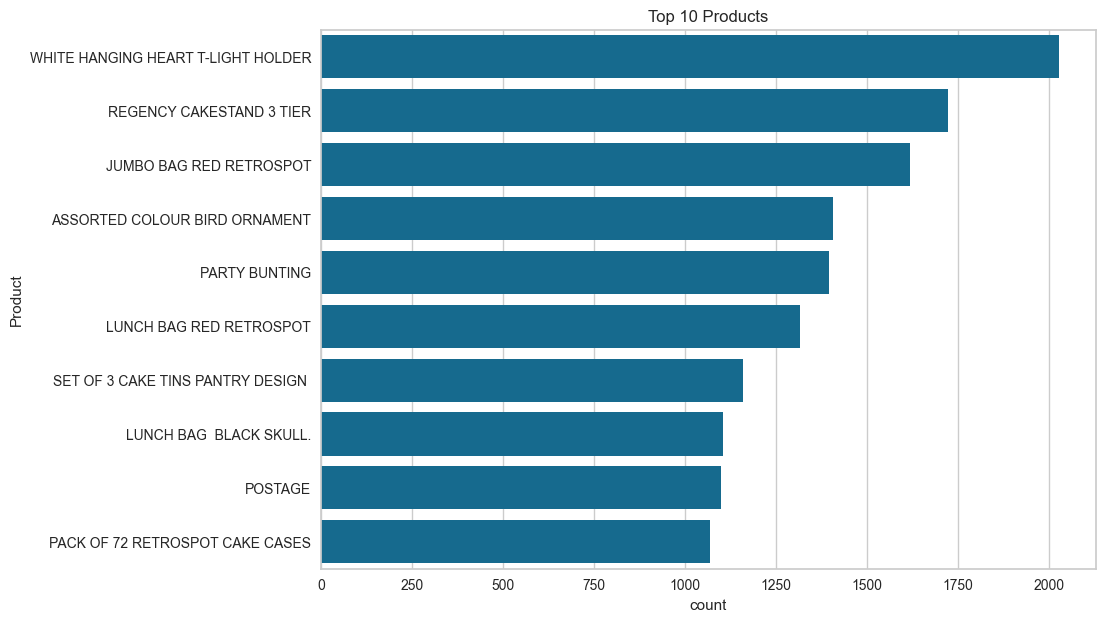

In [369]:
plt.figure(figsize=(10,7))
sns.barplot(x=top_10_prod['count'],y=top_10_prod['Product'])
plt.title('Top 10 Products')

### Observation 
* White heart is highest selling with count of 2028 units
* regency 3 tier is 2nd highest with count of 1723 units

In [370]:
top_10_stock=df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode'}).head(10)
top_10_stock

,StockCode,count
0,85123A,2035
1,22423,1723
2,85099B,1618
3,84879,1408
4,47566,1396
5,20725,1317
6,22720,1159
7,20727,1105
8,POST,1099
9,23203,1098


Text(0.5, 1.0, 'Top 10 Products in terms of Stocks')

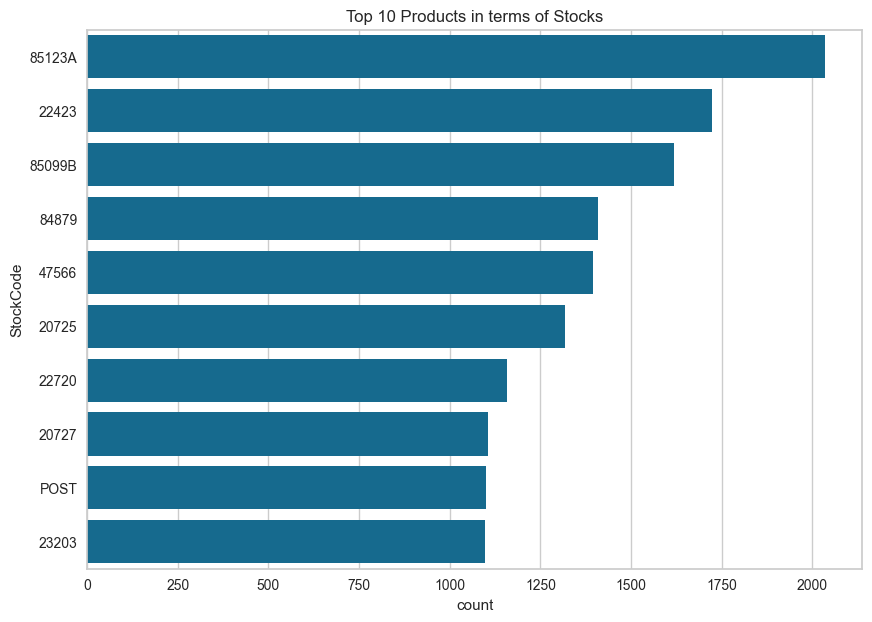

In [371]:
plt.figure(figsize=(10,7))
sns.barplot(x=top_10_stock['count'],y=top_10_stock['StockCode'])
plt.title('Top 10 Products in terms of Stocks')

### Observation
* 85123A is highest selling with count of 2035
* 22423 is 2nd highest selling with count of 1723

In [372]:
top_10_cust=df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID'}).head(10)
top_10_cust

,CustomerID,count
0,17841.0,7847
1,14911.0,5675
2,14096.0,5111
3,12748.0,4595
4,14606.0,2700
5,15311.0,2379
6,14646.0,2076
7,13089.0,1818
8,13263.0,1677
9,14298.0,1637


Text(0.5, 1.0, 'Top 10 Customers')

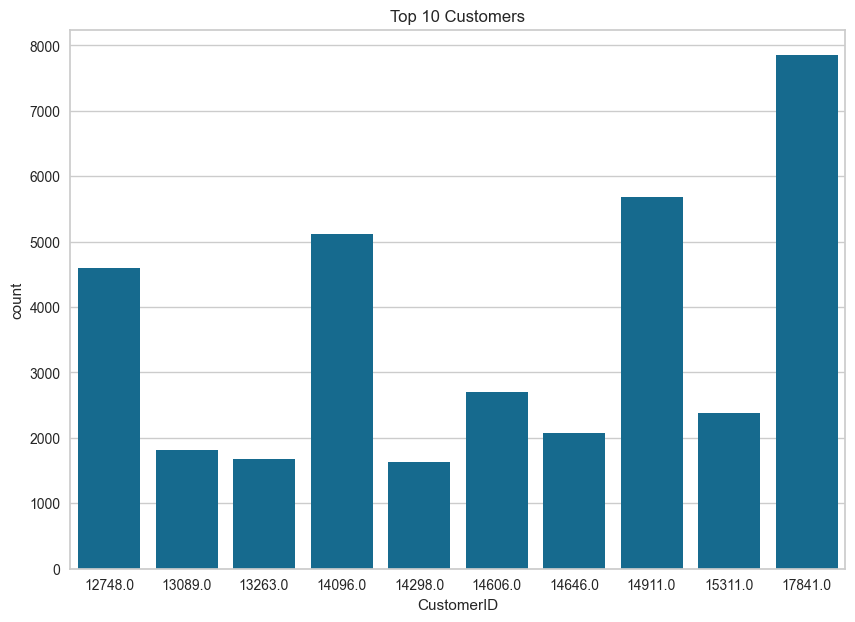

In [373]:
plt.figure(figsize=(10,7))
sns.barplot(x=top_10_cust['CustomerID'],y=top_10_cust['count'])
plt.title('Top 10 Customers')

### observation
* 17841 id had purchased highest no. of products
* 14911 id had purchased 2nd highest no. of products

In [374]:
top_5_country=df['Country'].value_counts().reset_index().rename(columns={'index':'Country'}).head(5)
top_5_country

,Country,count
0,United Kingdom,354321
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484


Text(0.5, 1.0, 'Top 5 Country')

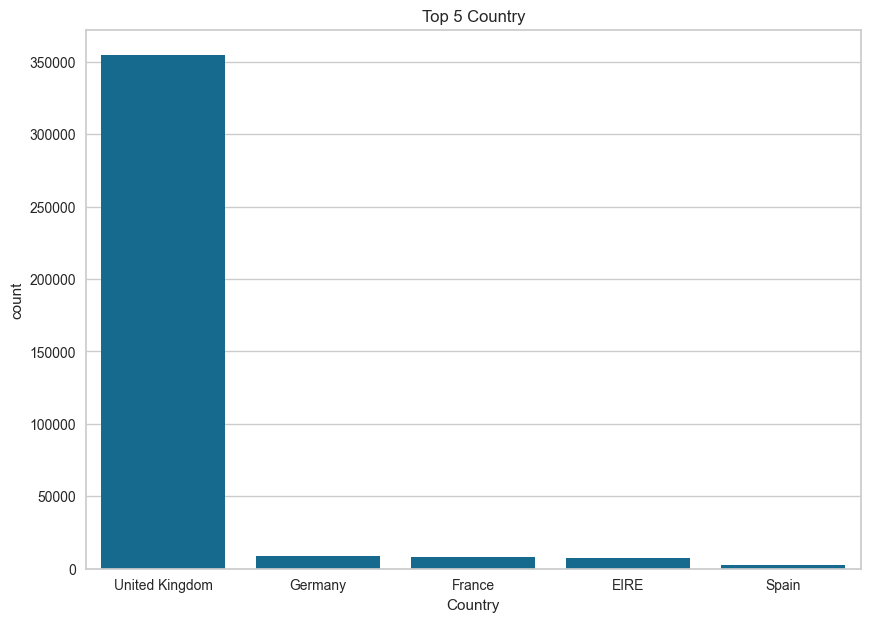

In [375]:
plt.figure(figsize=(10,7))
sns.barplot(x=top_5_country['Country'],y=top_5_country['count'])
plt.title('Top 5 Country')

### observation 
* it can be seen that UK has internal market 

In [376]:
sales_month=df['Month'].value_counts().reset_index().rename(columns={'index':'Month'})
sales_month

,Month,count
0,November,64531
1,October,49554
2,December,43461
3,September,40028
4,May,28320
5,June,27185
6,March,27175
7,August,27007
8,July,26825
9,April,22642


Text(0.5, 1.0, 'Sales count in each Month')

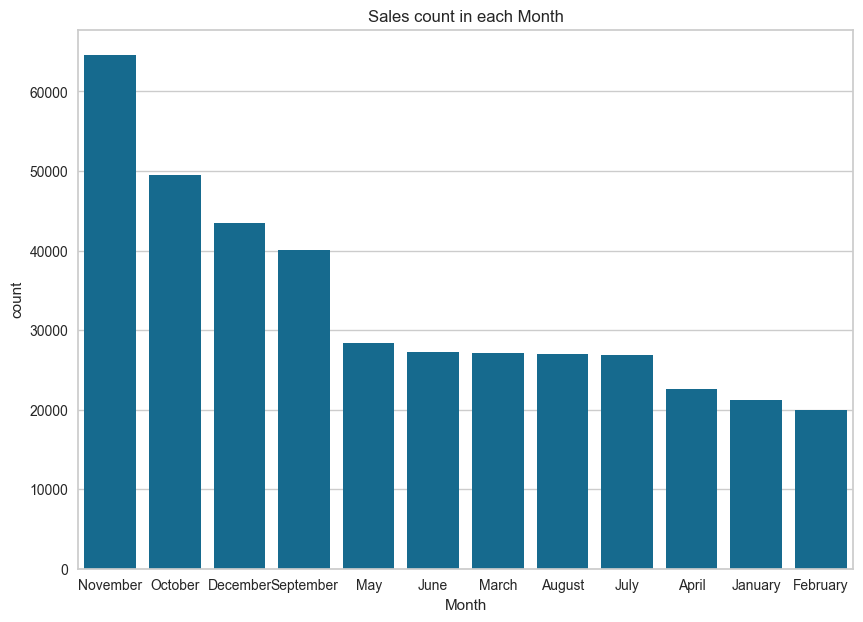

In [377]:
plt.figure(figsize=(10,7))
sns.barplot(x=sales_month['Month'],y=sales_month['count'])
plt.title('Sales count in each Month')

### observation 
* November had most frequent sales
* Feb had least frequent sales

In [378]:
sales_day=df['Day'].value_counts().reset_index().rename(columns={'index':'Day'})
sales_day

,Day,count
0,Thursday,80035
1,Wednesday,68885
2,Tuesday,66473
3,Monday,64893
4,Sunday,62773
5,Friday,54825


Text(0.5, 1.0, 'Sales count on Days')

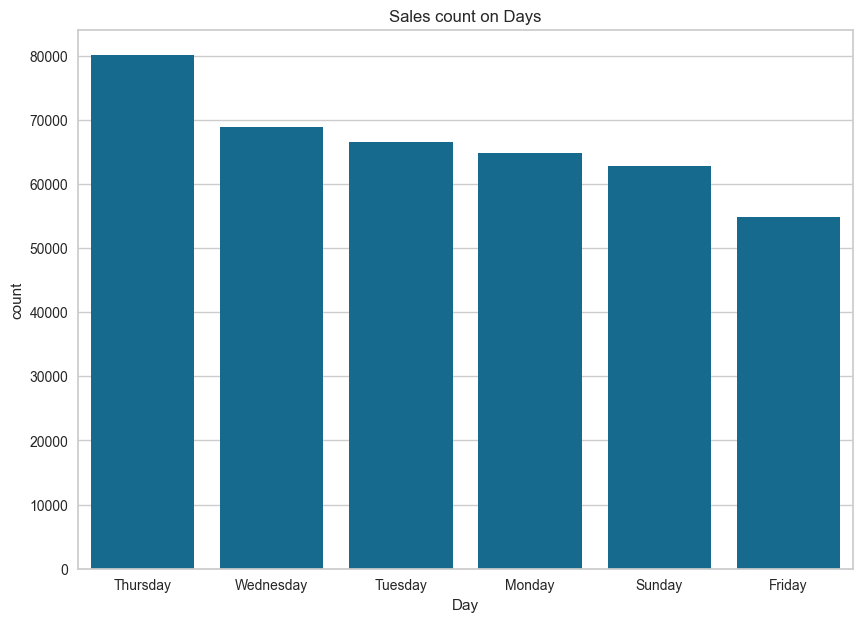

In [379]:
plt.figure(figsize=(10,7))
sns.barplot(x=sales_day['Day'],y=sales_day['count'])
plt.title('Sales count on Days')

### observation 
* most sales occur on Thursday 
* least sales occur on Friday

In [380]:
df['hour'].unique()

array([ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17,  7, 18, 19, 20,  6],
      dtype=int64)

In [381]:
def time(time):
    if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
        return 'Morning'
    elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
        return 'Afternoon'
    else:
        return 'Evening'

df['Day_time']=df['hour'].apply(time)

In [382]:
sales_time=df['Day_time'].value_counts().reset_index().rename(columns={'index':'Day Time'})
sales_time

,Day_time,count
0,Afternoon,272738
1,Morning,118095
2,Evening,7051


Text(0.5, 1.0, 'Sales count on Days Timings')

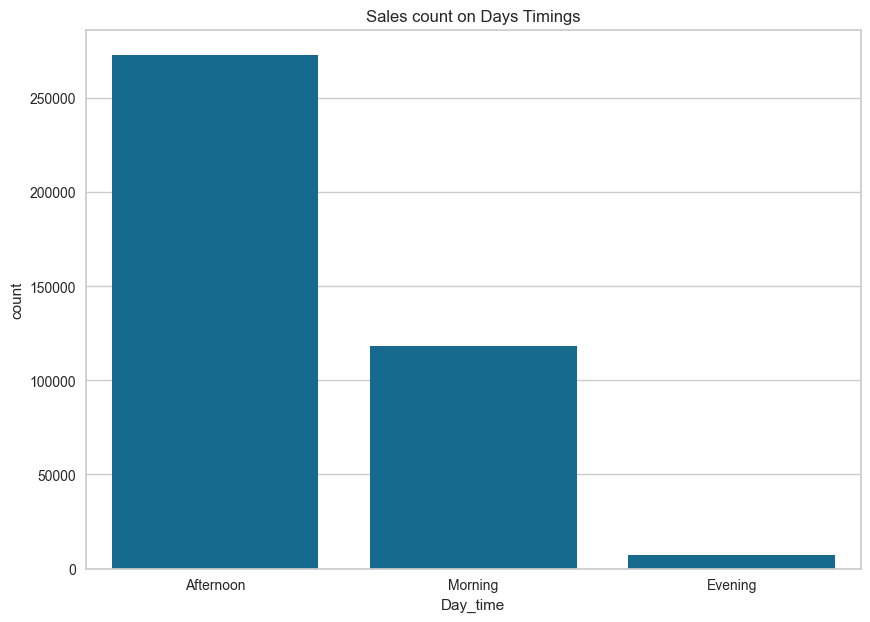

In [383]:
plt.figure(figsize=(10,7))
sns.barplot(x=sales_time['Day_time'],y=sales_time['count'])
plt.title('Sales count on Days Timings')

### observation 
* most sales occur in Afternoon 
* least sales occur in evening

In [384]:
avg_amt=df.groupby('CustomerID')['Total_amount'].mean().reset_index().rename(columns={'Total_amount':'avg_amt'}).sort_values('avg_amt',ascending=False).head(5)
avg_amt

,CustomerID,avg_amt
0,12346.0,77183.60
3008,16446.0,56157.50
2011,15098.0,13305.50
2502,15749.0,4453.43
2087,15195.0,3861.00


Text(0.5, 1.0, 'Average amount spent by customer ')

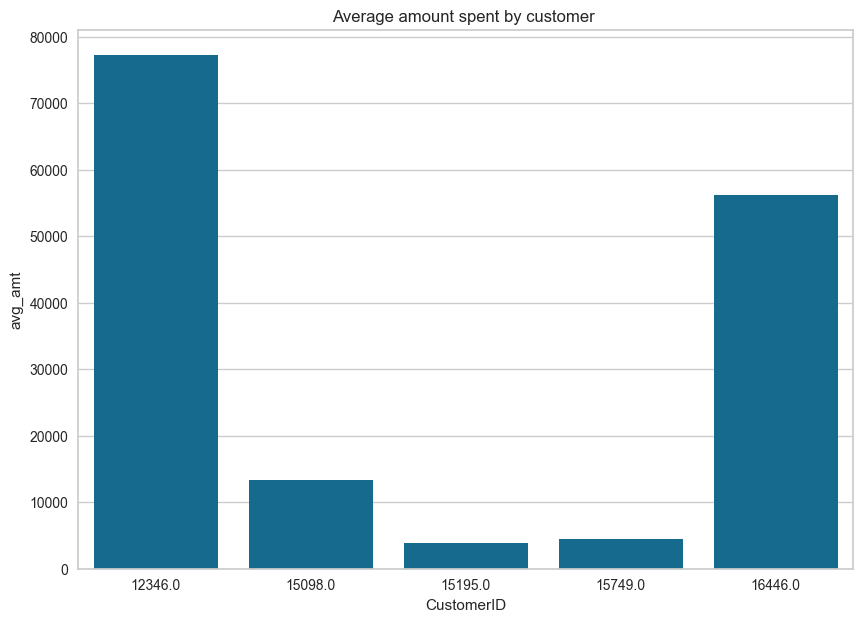

In [385]:
plt.figure(figsize=(10,7))
sns.barplot(x=avg_amt['CustomerID'],y=avg_amt['avg_amt'])
plt.title('Average amount spent by customer ')

### observation 
* id 12346 spent 77183.60 on average
* id 16446 spent 56157.50 on average

## RFM Analysis
* R is recency which is how recently customer made purchase
* F is frequency which is how frequently customer made purchase 
* M is monetary which is how many transactions each customer has done

In [386]:
import datetime as dd
max_date=dd.datetime(2011,12,10)
cust_history_df=df.groupby('CustomerID').agg({'InvoiceDate':lambda x :(max_date-x.max()).days,'InvoiceNo':lambda x: len(x),'Total_amount':lambda x: x.sum()})
cust_history_df['InvoiceDate']=cust_history_df['InvoiceDate'].astype(int)
cust_history_df.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total_amount':'Monetary'},inplace=True)
cust_history_df.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


Text(0, 0.5, 'Frequency')

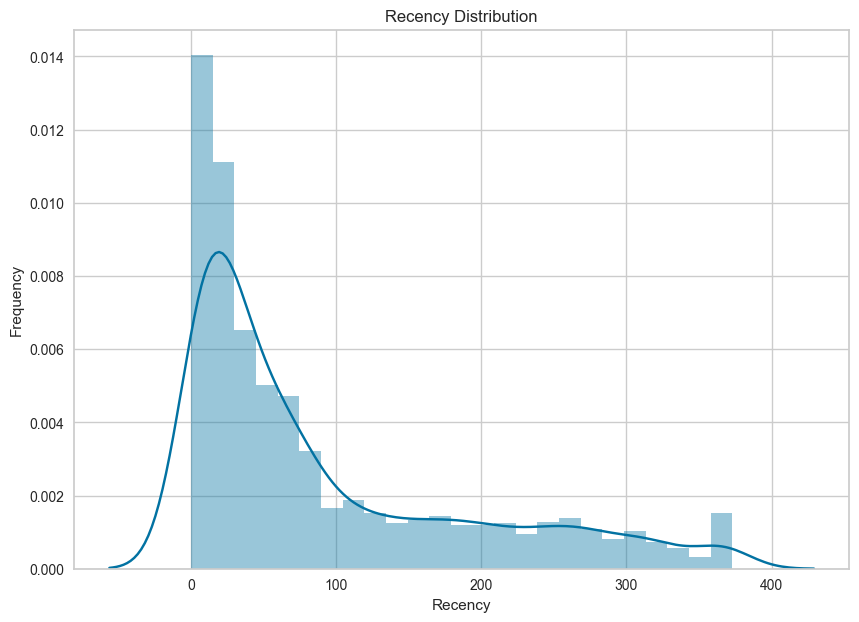

In [387]:
#Checking distribution 
plt.figure(figsize=(10,7))
sns.distplot(cust_history_df['Recency'])
plt.title('Recency Distribution')
plt.ylabel('Frequency')


Recency Ditribution is rightly skewed

Text(0.5, 1.0, 'Frequency Distribution')

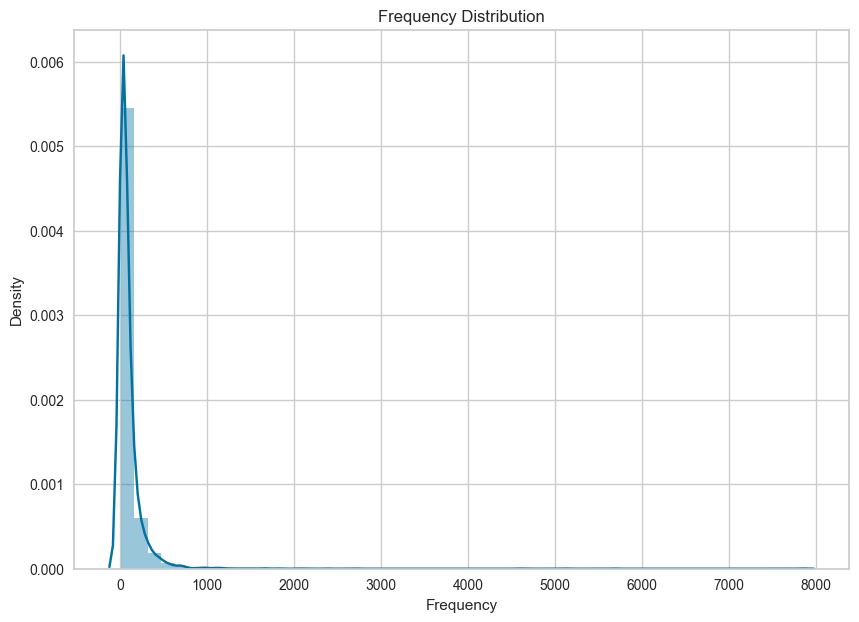

In [388]:
plt.figure(figsize=(10,7))
sns.distplot(cust_history_df['Frequency'])
plt.title('Frequency Distribution')


Frequency Distribution is rightly skewed

Text(0.5, 1.0, 'Monetary Distribution')

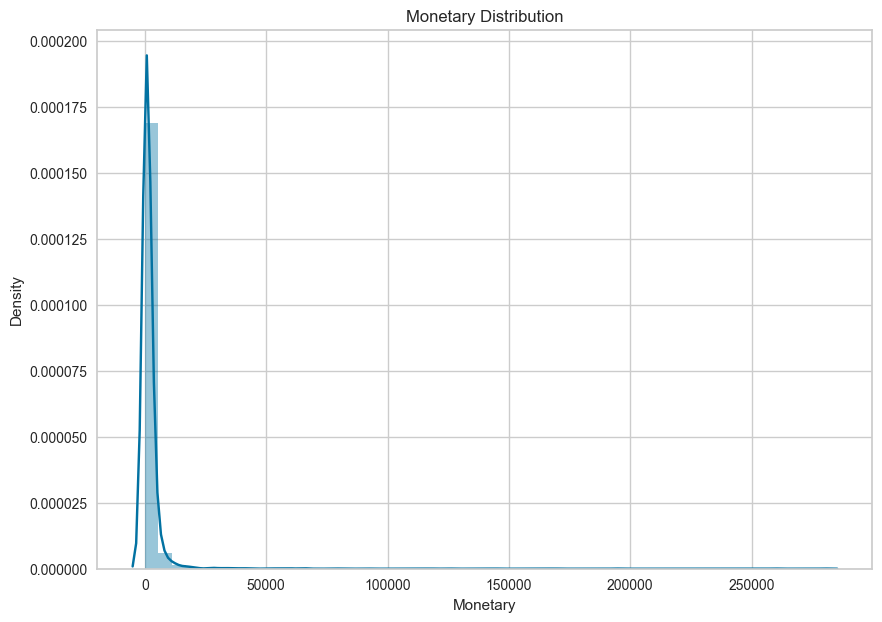

In [389]:
plt.figure(figsize=(10,7))
sns.distplot(cust_history_df['Monetary'])
plt.title('Monetary Distribution')

Monetary Distribution is rightly skewed

Clustering Models require normal distribution of data to perform efficiently.since all r,f,m distributions are skewed, applying log transform will solve it.

In [390]:
from sklearn.preprocessing import StandardScaler
cust_history_df['r_log']=np.log(cust_history_df['Recency']+0.1)
cust_history_df['f_log']=cust_history_df['Frequency'].apply(np.log)
cust_history_df['m_log']=cust_history_df['Monetary'].apply(np.log)
feature_vec=['m_log','r_log','f_log']
X_subset=cust_history_df[feature_vec]
scaler=StandardScaler().fit(X_subset)
X_scaled=scaler.transform(X_subset)
pd.DataFrame(X_scaled,columns=X_subset.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
m_log,4338.0,6.551800e-18,1.000115,-4.179280,-0.684183,-0.060942,0.654244,4.721395
r_log,4338.0,-1.113806e-16,1.000115,-3.956569,-0.582069,0.123421,0.806466,1.441167
f_log,4338.0,-9.172520e-17,1.000115,-2.775160,-0.638433,0.025507,0.697925,3.988157


In [391]:
X_scaled

array([[ 3.69871931,  1.35078439, -2.77515957],
       [ 1.410201  , -1.95843361,  1.1495495 ],
       [ 0.71641884,  0.38909265, -0.18534723],
       ...,
       [-1.11736527, -1.15895082, -0.90111592],
       [ 0.83796882, -1.70282595,  2.22351465],
       [ 0.73389579,  0.00924117,  0.42893082]])

<Axes: xlabel='m_log', ylabel='Density'>

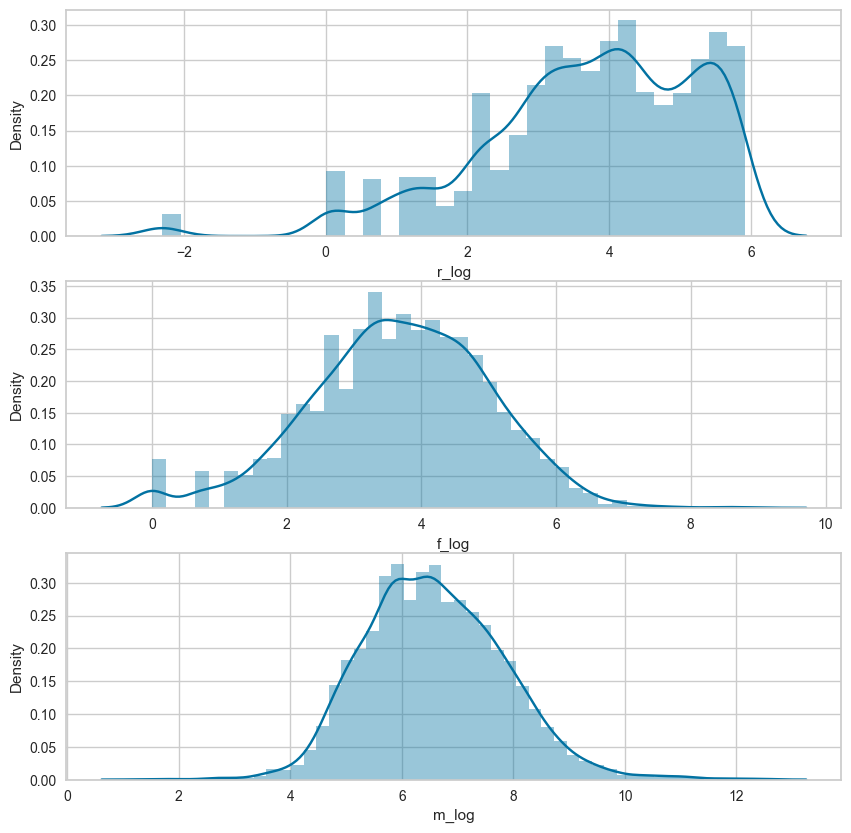

In [392]:
plt.figure(figsize=(10,10))
plt.subplot(3,1,1)
sns.distplot(cust_history_df['r_log'])
plt.subplot(3,1,2)
sns.distplot(cust_history_df['f_log'])
plt.subplot(3,1,3)
sns.distplot(cust_history_df['m_log'])


<Axes: xlabel='f_log', ylabel='m_log'>

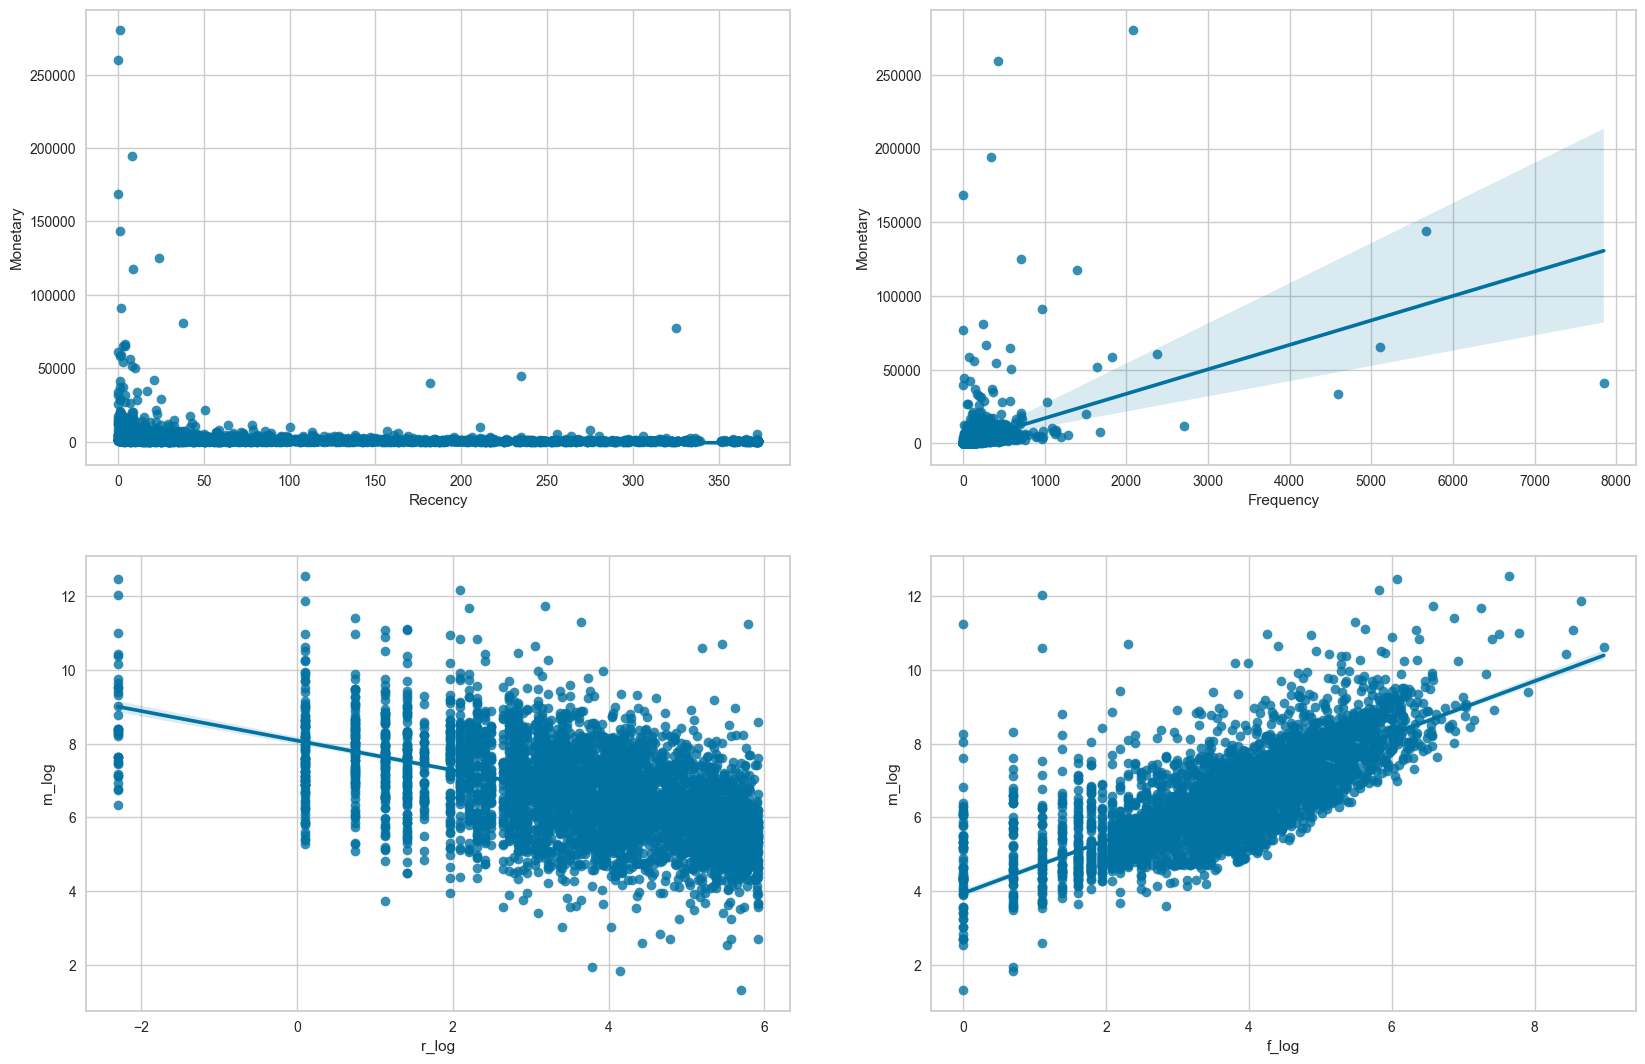

In [472]:
plt.figure(figsize=(20,13))
plt.subplot(2,2,1)
sns.regplot(x='Recency',y='Monetary',data=cust_history_df)
plt.subplot(2,2,2)
sns.regplot(x='Frequency',y='Monetary',data=cust_history_df)
plt.subplot(2,2,3)
sns.regplot(x='r_log',y='m_log',data=cust_history_df)
plt.subplot(2,2,4)
sns.regplot(x='f_log',y='m_log',data=cust_history_df)

### observation 
* customers who frequently purchase spent more amount

## Model Implementation

In [396]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [397]:
X_scaled=pd.DataFrame(X_scaled,columns=feature_vec)
X_scaled

,m_log,r_log,f_log
0,3.698719,1.350784,-2.775160
1,1.410201,-1.958434,1.149549
2,0.716419,0.389093,-0.185347
3,0.698706,-0.544769,0.460579
4,-0.617446,1.319782,-0.638433
...,...,...,...
4333,-1.106086,1.245937,-1.038617
4334,-1.743850,0.963157,-1.307611
4335,-1.117365,-1.158951,-0.901116
4336,0.837969,-1.702826,2.223515


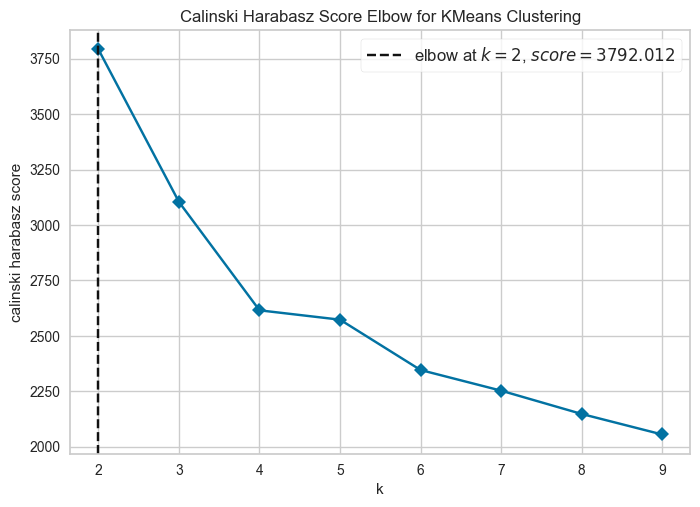

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [398]:
# aaplying elbow method to find out optimal no. of clusters

from yellowbrick.cluster import KElbowVisualizer
visualizer=KElbowVisualizer(KMeans(),k=(2,10),metric='calinski_harabasz',timings=False)
visualizer.fit(X_scaled)
visualizer.show()

In [399]:
#to validate cluster no. silhouette score is used
for n_clusters in range(2,11):
    clusterer=KMeans(n_clusters=n_clusters,random_state=44)
    pred=clusterer.fit_predict(X_scaled)
    score=silhouette_score(X_scaled , pred)
    print(f'For n={n_clusters},silhouette score is {score}')

For n=2,silhouette score is 0.3955081793433134
For n=3,silhouette score is 0.307614675877662
For n=4,silhouette score is 0.25291103823810546
For n=5,silhouette score is 0.27686094925078475
For n=6,silhouette score is 0.27239059052854125
For n=7,silhouette score is 0.26588672817520675
For n=8,silhouette score is 0.2515775230576073
For n=9,silhouette score is 0.2525920123188769
For n=10,silhouette score is 0.2638677372244154


as observed optimal no. of clusters are **2** with silhouette score =0.43

In [400]:
kc=KMeans(n_clusters=2,init='k-means++',random_state=44)
kc.fit(X_scaled)
yc=kc.predict(X_scaled)

In [401]:
cust_history_df['cluster-based-on-rfm']=kc.labels_
cust_history_df.head(10)

,Recency,Frequency,Monetary,r_log,f_log,m_log,cluster-based-on-rfm
CustomerID,,,,,,,
12346.0,325,1,77183.60,5.784133,0.000000,11.253942,1
12347.0,2,182,4310.00,0.741937,5.204007,8.368693,0
12348.0,75,31,1797.24,4.318821,3.433987,7.494007,1
12349.0,18,73,1757.55,2.895912,4.290459,7.471676,0
12350.0,310,17,334.40,5.736895,2.833213,5.812338,1
12352.0,36,85,2506.04,3.586293,4.442651,7.826459,0
12353.0,204,4,89.00,5.318610,1.386294,4.488636,1
12354.0,232,58,1079.40,5.447168,4.060443,6.984161,1
12355.0,214,13,459.40,5.366443,2.564949,6.129921,1


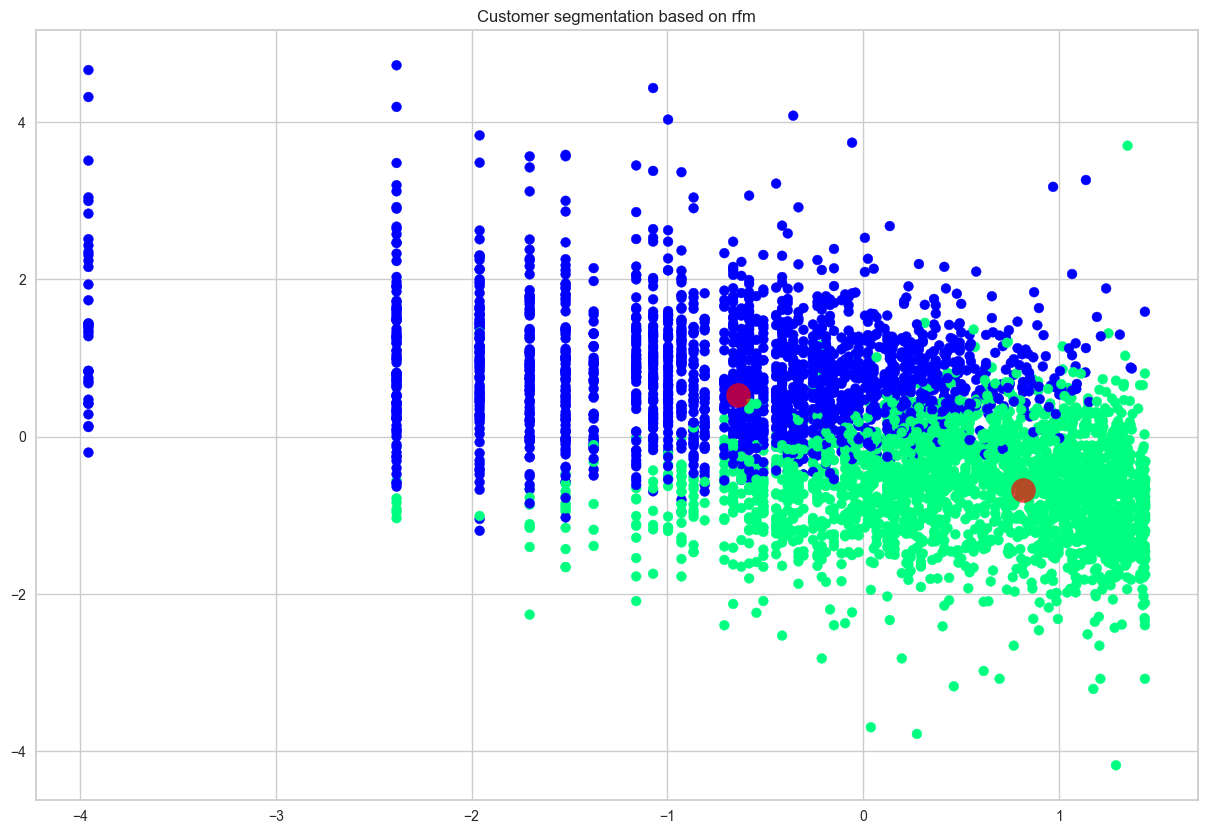

In [411]:
plt.figure(figsize=(15,10))
plt.title('Customer segmentation based on rfm')
plt.scatter(X_scaled['r_log'],X_scaled['m_log'],c=yc,s=50,cmap='winter')
center=kc.cluster_centers_
plt.scatter(center[:,0],center[:,1],c='red',s=300,alpha=0.7)

In [412]:
import scipy.cluster.hierarchy as hc

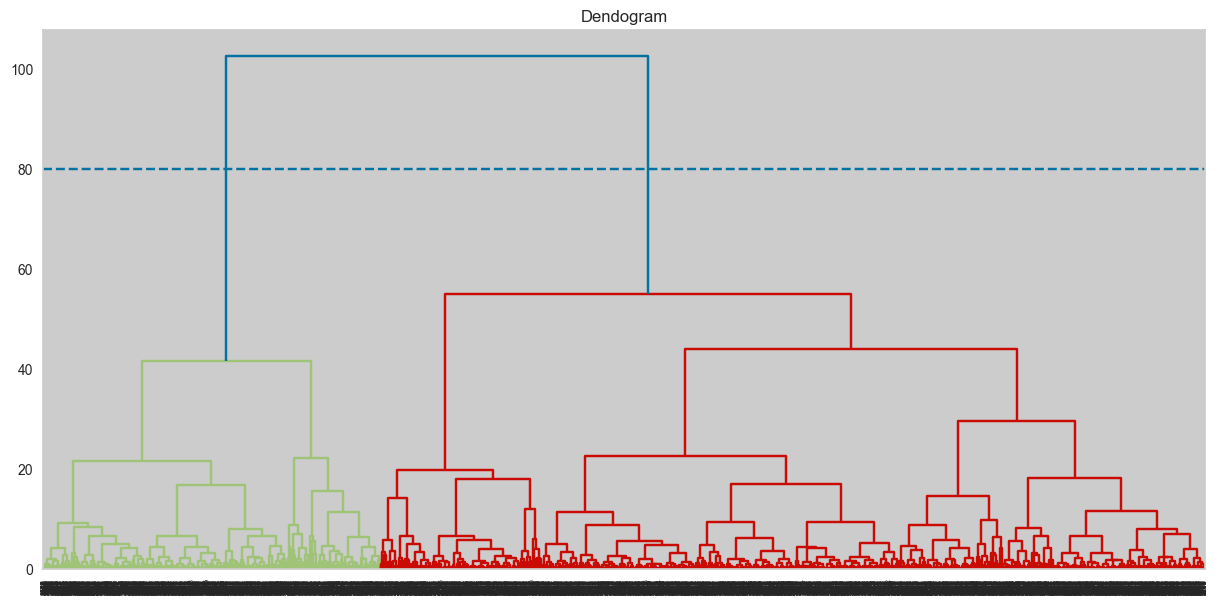

In [415]:
plt.figure(figsize=(15,7))
dendogram=hc.dendrogram(hc.linkage(X_scaled,method='ward'))
plt.title('Dendogram')
plt.axhline(y=80,color='b',linestyle='--')

No of cluster = **2**

In [432]:
X_s=X_scaled.values
X_s

array([[ 3.69871931,  1.35078439, -2.77515957],
       [ 1.410201  , -1.95843361,  1.1495495 ],
       [ 0.71641884,  0.38909265, -0.18534723],
       ...,
       [-1.11736527, -1.15895082, -0.90111592],
       [ 0.83796882, -1.70282595,  2.22351465],
       [ 0.73389579,  0.00924117,  0.42893082]])

In [433]:
from sklearn.cluster import AgglomerativeClustering
h_c=AgglomerativeClustering(n_clusters=2,linkage='ward')
y_hc=h_c.fit_predict(X_s)

In [434]:
y_hc.shape

(4338,)

In [435]:
X_s.shape

(4338, 3)

Text(0.5, 1.0, 'Customer Clusters')

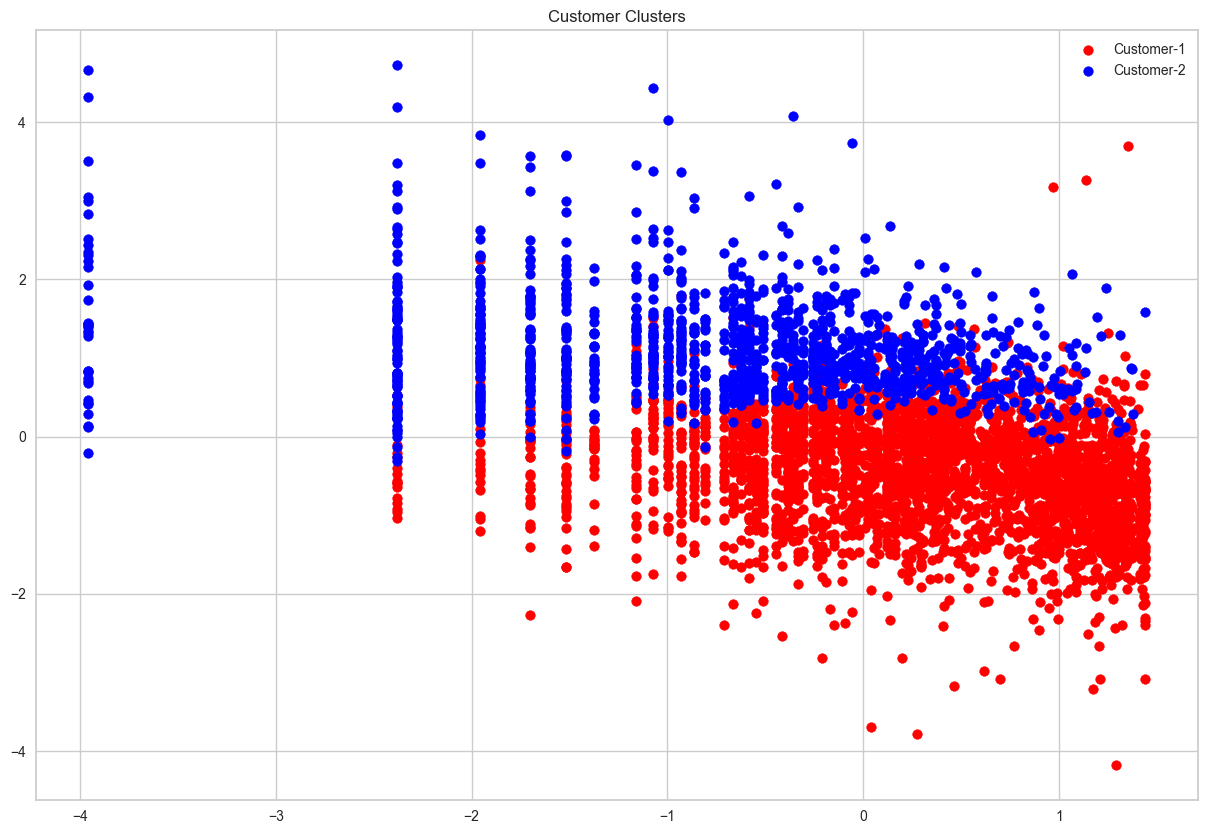

In [440]:

plt.figure(figsize=(15,10))
plt.scatter(X_s[y_hc == 0,1],X_s[y_hc == 0,0],c='red',label='Customer-1')
plt.scatter(X_s[y_hc == 1,1],X_s[y_hc == 1,0],c='blue',label='Customer-2')

plt.legend()
plt.title('Customer Clusters')

In [443]:
normalized_df=cust_history_df[['Recency','Frequency','Monetary','cluster-based-on-rfm']]
normalized_df

,Recency,Frequency,Monetary,cluster-based-on-rfm
CustomerID,,,,
12346.0,325,1,77183.60,1
12347.0,2,182,4310.00,0
12348.0,75,31,1797.24,1
12349.0,18,73,1757.55,0
12350.0,310,17,334.40,1
...,...,...,...,...
18280.0,277,10,180.60,1
18281.0,180,7,80.82,1
18282.0,7,12,178.05,1


In [445]:
normalized_df.groupby('cluster-based-on-rfm').agg({'Recency':['mean','min','max'],'Frequency':['mean','min','max'],'Monetary':['mean','min','max','count'],})


Recency            Frequency               Monetary  \
                            mean min  max        mean min   max         mean   
cluster-based-on-rfm                                                           
0                      31.126768   0  372  176.733892   3  7847  4067.550918   
1                     139.947715   1  373   24.906958   1   157   471.985674   

                                               
                         min        max count  
cluster-based-on-rfm                           
0                     161.03  280206.02  1909  
1                       3.75   77183.60  2429

* Cluster 0 have 1909 customers who are frequent buyers and spent more money
* Cluster 1 have 2429 customers who purchases recently but not frequent buyers

## Association Rules

Association Rules have algorithms which helps us determine which product's purchasing is influencing other product's likelihood of purchasing.

Transaction dataset is needed to define these rules 

In [447]:
items=list(df.Description.unique())
group=df.groupby('InvoiceNo')
transaction_lvl=group.aggregate(lambda x: tuple(x)).reset_index()[['InvoiceNo','Description']]
transaction_dct={item:0 for item in items}
output_dct=dict()
temp=dict()
for rec in transaction_lvl.to_dict('records'):
    invoice_no=rec['InvoiceNo']
    item_list=rec['Description']
    transaction_dct={item:0 for item in items}
    transaction_dct.update({item:1 for item in items if item in item_list})
    temp.update({invoice_no:transaction_dct})
new=[v for k,v in temp.items()]
transaction_df=pd.DataFrame(new)

In [448]:
transaction_df

,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,ASSORTED COLOUR BIRD ORNAMENT,...,SILVER AND BLACK ORBIT NECKLACE,"LETTER ""F"" BLING KEY RING","LETTER ""O"" BLING KEY RING","LETTER ""T"" BLING KEY RING","LETTER ""U"" BLING KEY RING","LETTER ""W"" BLING KEY RING","LETTER ""Z"" BLING KEY RING",PINK CRYSTAL SKULL PHONE CHARM,CREAM HANGING HEART T-LIGHT HOLDER,"PAPER CRAFT , LITTLE BIRDIE"
0,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18529,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


there are 3877 products but only handful of them are responsible for sales
so transaction_df dataset is pruned to work with top 15 products

In [450]:
def prune_df(input_df, length_tran=2,start=None,end=None):
    if 'total_items' in input_df.columns:
        del(input_df['total_items'])
    total_items=sum(input_df.sum().sort_values(ascending=False))
    item_count=input_df.sum().sort_values(ascending=False).reset_index()
    item_count.rename(columns={item_count.columns[0]:'item_name',item_count.columns[1]:'item_count'},inplace=True)
    if end > start :
        select_item=list(item_count[start:end].item_name)
        input_df['total_items']=input_df[select_item].sum(axis=1)
        input_df=input_df[input_df.total_items>= length_tran]
        del(input_df['total_items'])
        return input_df[select_item],item_count[start:end]

In [451]:
output_df,item_counts=prune_df(input_df=transaction_df,length_tran=2,start=0,end=15)
print('No. of sales',output_df.shape[0])
print('No. of Products',output_df.shape[1])
item_counts

No. of sales 4668
No. of Products 15


,item_name,item_count
0,WHITE HANGING HEART T-LIGHT HOLDER,1971
1,REGENCY CAKESTAND 3 TIER,1703
2,JUMBO BAG RED RETROSPOT,1600
3,PARTY BUNTING,1379
4,ASSORTED COLOUR BIRD ORNAMENT,1375
5,LUNCH BAG RED RETROSPOT,1288
6,SET OF 3 CAKE TINS PANTRY DESIGN,1146
7,POSTAGE,1099
8,LUNCH BAG BLACK SKULL.,1052
9,PACK OF 72 RETROSPOT CAKE CASES,1029


In [453]:
import Orange
from orangecontrib.associate.fpgrowth import *
assoc_rule=output_df
domain_tran=Orange.data.Domain([Orange.data.DiscreteVariable.make(name=item,values=['0','1'])\
                                for item in assoc_rule.columns])
data_tran=Orange.data.Table.from_numpy(domain=domain_tran,X=assoc_rule.values,Y=None)
data_tran_en,mapping=OneHot.encode(data_tran,include_class=True)

In [454]:
support=0.01
print('No of required transaction= ',int(assoc_rule.shape[0]*support))
no_tran=assoc_rule.shape[0]*support
itemsets=dict(frequent_itemsets(data_tran_en,support))
print("Items Set Size",len(itemsets))

No of required transaction=  46
Items Set Size 667481


In [455]:
confidence = 0.6
rules_df = pd.DataFrame()
if len(itemsets) < 1000000: 
    rules = [(P, Q, supp, conf)
    for P, Q, supp, conf in association_rules(itemsets, confidence)
       if len(Q) == 1 ]

    names = {item: '{}={}'.format(var.name, val)
        for item, var, val in OneHot.decode(mapping, data_tran, mapping)}
    
    eligible_ante = [v for k,v in names.items() if v.endswith("1")]
    
    N = assoc_rule.shape[0]
    
    rule_stats = list(rules_stats(rules, itemsets, N))
    
    rule_list_df = []
    for stat in rule_stats:
        ante = stat[0]            
        cons = stat[1]
        named_cons = names[next(iter(cons))]
        if named_cons in eligible_ante:
            rule_lhs = [names[i][:-2] for i in ante if names[i] in eligible_ante]
            ante_rule = ', '.join(rule_lhs)
            if ante_rule and len(rule_lhs)>1 :
                rule_dict = {'support' : stat[2],
                             'confidence' : stat[3],
                             'coverage' : stat[4],
                             'strength' : stat[5],
                             'lift' : stat[6],
                             'leverage' : stat[7],
                             'antecedent': ante_rule,
                             'consequent':named_cons[:-2] }
                rule_list_df.append(rule_dict)
    rules_df = pd.DataFrame(rule_list_df)
    print("Raw rules data frame of {} rules generated".format(rules_df.shape[0]))
    if not rules_df.empty:
        pruned_rules_df = rules_df.groupby(['antecedent','consequent']).max().reset_index()
    else:
        print("Unable to generate any rule")

Raw rules data frame of 13925 rules generated


In [468]:

(rules_df[['consequent','antecedent','support','confidence','lift']].\
 groupby(['consequent','antecedent']).first().reset_index().sort_values(['confidence','support','lift'],ascending=False)).head()

,consequent,antecedent,support,confidence,lift
31,LUNCH BAG RED RETROSPOT,"LUNCH BAG BLACK SKULL., LUNCH BAG CARS BLUE, JUMBO BAG RED RETROSPOT, LUNCH BAG SPACEBOY DESIGN",52,0.812500,3.227872
22,LUNCH BAG RED RETROSPOT,"JUMBO BAG RED RETROSPOT, LUNCH BAG BLACK SKULL., LUNCH BAG SPACEBOY DESIGN , LUNCH BAG CARS BLUE",47,0.796610,3.164746
20,LUNCH BAG RED RETROSPOT,"JUMBO BAG RED RETROSPOT, LUNCH BAG BLACK SKULL., LUNCH BAG CARS BLUE",47,0.783333,3.112000
36,LUNCH BAG RED RETROSPOT,"LUNCH BAG BLACK SKULL., PACK OF 72 RETROSPOT CAKE CASES, LUNCH BAG SPACEBOY DESIGN",47,0.770492,3.060984
30,LUNCH BAG RED RETROSPOT,"LUNCH BAG BLACK SKULL., LUNCH BAG CARS BLUE, JUMBO BAG RED RETROSPOT",87,0.763158,3.031848


### Above are consequent-antecendent pairs with highest confidence 
* consequent products determines likelihood of purchasing antecedent products

In [469]:

(rules_df[['consequent','antecedent','support','confidence','lift']].\
 groupby(['consequent','antecedent']).first().reset_index().sort_values(['support','confidence','lift'],ascending=False)).head()

,consequent,antecedent,support,confidence,lift
39,LUNCH BAG RED RETROSPOT,"LUNCH BAG CARS BLUE, LUNCH BAG SPACEBOY DESIGN",211,0.604585,2.401873
40,LUNCH BAG RED RETROSPOT,"LUNCH BAG SPACEBOY DESIGN , LUNCH BAG CARS BLUE",151,0.604000,2.399551
32,LUNCH BAG RED RETROSPOT,"LUNCH BAG BLACK SKULL., LUNCH BAG CARS BLUE, LUNCH BAG SPACEBOY DESIGN",136,0.690355,2.742620
7,LUNCH BAG BLACK SKULL.,"LUNCH BAG RED RETROSPOT, LUNCH BAG CARS BLUE, LUNCH BAG SPACEBOY DESIGN",136,0.644550,3.263295
33,LUNCH BAG RED RETROSPOT,"LUNCH BAG BLACK SKULL., LUNCH BAG SPACEBOY DESIGN",134,0.606335,2.408826


### above are highest support consequent-antecedant pairs

In [470]:
rules_df.lift.apply(lambda x: "Greater than 1 "if x>1 else 'one'\
                    if x==0 else 'Less than 1').value_counts()

lift
Greater than 1     13925
Name: count, dtype: int64

Lift greater than 1 indicates purchasing Product-A increase likelihood of purchasing Product-B
Lift less than 1 indicates purchasing Product-A decrease likelihood of purchasing Product-B

13925 rules have lift greater than 1 which means rules are valid